# Getting Started With OpenAI Gym: The Basic Building Blocks

This tutorial will cover all of the basic building blocks of OpenAI Gym, including environments, spaces, wrappers, and vectorized environments. You can follow along with the full tutorial [on the Paperspace blog](https://blog.paperspace.com/getting-started-with-openai-gym/). 


## Installation 

First thing's first, we begin with the installation of the OpenAI gym. We can install gym from pip.

In [23]:
# !pip install gym

# Environments 

The fundamental building block of OpenAI gym is the `Env` class. This is a Python class that basically implements a simulator that runs the  environment you want to train your agent in. OpenAI Gym comes packed with a lot of environments, such as ones where you move a car up a hill, balance a swinging pendulum, atari games, etc. Gym also provides you with the ability to create your custom environments. 

We start with an environment called `MountainCar` where the objective is to drive a car up a mountain. The car is on a one-dimensional track positioned between two "mountains". The goal is to drive up the mountain on the right; however, the car's engine is not strong enough to scale the mountain in a single pass. Therefore, the only way to succeed is to drive back and forth to build up momentum.

In [2]:
from pyvirtualdisplay import Display
display = Display(visible=0,size=(600,600))
display.start()

In [3]:
import gym
env = gym.make('MountainCar-v0')

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


The basic structure of the environment is described by the `observation_space` and the `action_space` attributes of the Gym `Env` class. 

`observation_space` defines the structure as well as the legitimate values for the observation of the state of the environment. The observation can be different things for each environment. The most common form is a screenshot of the game. There can be other forms of observations as well, such as certain characteristics of the environment described in vector form. 

Similarly, the `Env` class also defines an attribute called the `action_space`, which describes the numerical structure of the legitimate actions that can be applied to the environment. 

In [4]:
# Observation and action space 
obs_space = env.observation_space
action_space = env.action_space
print("The observation space: {}".format(obs_space))
print("The action space: {}".format(action_space))

The observation space: Box(2,)
The action space: Discrete(3)


The observation for the mountain car is a vector of two numbers representing velocity and position. The middle point between the two mountains is taken to be the origin, with right being the positive direction and left being the negative. 

We see that both the observation space as well as the action space are represented by classes called `Box` and `Discrete`. These are one of the various data structures provided by `Gym` in order to implement observation and action spaces for different kinds of scenarios (discrete action space, continous action space, etc.). We will dig further into these later in the tutorial. 

## Interacting With the Environment 

In this section, we cover functions of the `Env` class that help the agent interact with the environment. Such functions are:

1. `reset`: This function resets the environment to its initial state and returns the observation of the environment corresponding to the initial state. 
2. `step` : This function takes an action as an input and applies it to the the environment, which leads to the environment transitioning to a new state. The reset function returns you 4 things:
    * `observation`: The observation of the state of the environment.
    * `reward`: The reward that you get from the environment after executing the action that was given as the input to the `step` function. 
    * `done`: Whether the episode has been terminated. If true, you may need to end the simulation or reset the environment to restart the episode. 
    * `info`: This provides additional information depending upon the environment, such as number of lives left, or general information that may be conducive in debugging.

Let us now see an example that illustrates the concepts discussed above. We first begin by resetting the environment, then we inspect an observation. We then apply an action and inspect the new observation.

In [5]:
import matplotlib.pyplot as plt 

# reset the environment and see the initial observation
obs = env.reset()
print("The initial observation is {}".format(obs))

# Sample a random action from the entire action space
random_action = env.action_space.sample()

# # Take the action and get the new observation space
new_obs, reward, done, info = env.step(random_action)
print("The new observation is {}".format(new_obs))



The initial observation is [-0.54013665  0.        ]
The new observation is [-5.40012672e-01  1.23983216e-04]


In this case, our observation is not the screenshot of the task being performed. In many other environments (like Atari, as we will see) the observation is a screenshot of the game. In either of the scenarios, if you want to see what the environment looks like in the current state, you can use the `render` method. 

In [6]:
env.render(mode = "human")

True

This should display the environment in its current state in a pop-up window. You can close the window using the `close` function. 

In [7]:
env.close()

If you would rather like the screenshot of the game as an image, rather than a pop-up window, you should set the `mode` argument of the `render` function to `rgb_array`.

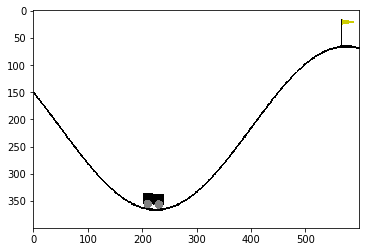

In [8]:
env_screen = env.render(mode = 'rgb_array')
env.close()

import matplotlib.pyplot as plt 
plt.imshow(env_screen)

Collecting all the tiny little blocks we have covered so far, the typical code for running your agent inside the `MountainCar` environment would look like the following. In our case, we just take random actions, but you can have an agent that does something more intelligent based on the observation you get.

In [9]:
import time 

# Number of steps you run the agent for 
num_steps = 1500

obs = env.reset()

for step in range(num_steps):
    # take random action, but you can also do something more intelligent
    # action = my_intelligent_agent_fn(obs) 
    action = env.action_space.sample()
    
    # apply the action
    obs, reward, done, info = env.step(action)
    
    # Render the env
    env.render()

    # Wait a bit before the next frame unless you want to see a crazy fast video
    time.sleep(0.001)
    
    # If the epsiode is up, then start another one
    if done:
        env.reset()

# Close the env
env.close()

# Spaces

The `observation_space` for our environment was `Box(2,)` and the `action_space` was `Discrete(2,)`. What do these actually mean? Both `Box` and `Discrete` are types of a data structures called `Spaces` provided by Gym to describe the legitimate values for the observation and actions for the environments. 

All of these data structures are derived from the `gym.Space` base class. 

In [10]:
type(env.observation_space)

gym.spaces.box.Box

`Box(n,)` corresponds to the n-dimensional continuous space `Discrete(2,)`. In our case `n=2`, and thus the observational space of our environment is a 2-D space. Of course, the space is bounded by upper and lower limits which describe the legitimate values our observations can take. We can determine this using `high` and `low` attributes of the observation space. These correspond to the maximum and minimum positions/velocities in our environment, respectively.

In [11]:
print("Upper Bound for Env Observation", env.observation_space.high)
print("Lower Bound for Env Observation", env.observation_space.low)

Upper Bound for Env Observation [0.6  0.07]
Lower Bound for Env Observation [-1.2  -0.07]


You can set these upper/lower limits while defining your space as well as when you are creating an environment. 

The `Discrete(n)` box describes a discrete space with `[0..n-1]` possible values. In our case `n = 3`, meaning our actions can take values of either 0, 1, or 2. Unlike `Box`, `Discrete` does not have a `high` and `low` method, since, by the very definition, it is clear what values are allowed. 

If you try to input invalid values (in our case, say, 4) in the `step` function of our environment, it will lead to an error.

In [12]:
# Works 
env.step(2)
print("It works!")

# Doesn't work.
env.step(4)
print("It works!")

It works!


AssertionError: 4 (<class 'int'>) invalid

There are multiple other spaces available for various use cases, such as `MultiDiscrete` which allows you to use  more than one discrete variable for your observation and action space. 

# Wrappers 


The `Wrapper` class in OpenAI Gym provides you with the functionality to modify various parts of an environment to suit your needs. Why might such a need arise? Maybe you want to normalize your pixel input, or maybe you want to clip your rewards. While typically you could accomplish the same by making another class that subclasses your environment `Env` class, `Wrapper` class allows us to do it more systematically. 

But before we begin, let's switch to a more complex environment that will really help us appreciate the utility that `Wrapper` brings to the table. This complex environment is going to be the the Atari game Breakout.

In [13]:
env = gym.make("BreakoutNoFrameskip-v4")

print("Observation Space: ", env.observation_space)
print("Action Space       ", env.action_space)


obs = env.reset()

for i in range(1000):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    env.render()
    time.sleep(0.01)
env.close()

Observation Space:  Box(210, 160, 3)
Action Space        Discrete(4)


Our observation space is a continous space of dimensions (210, 160, 3), corresponding to a RGB pixel observation of the same size, and our action space contains contains 4 discrete actions (Left, Right, Do Nothing, and Fire).

Now that we have our environment loaded, let us suppose we have to make certain changes to the Atari Environment. It's common practice in Deep RL that we construct our observation by concatenating the past `k` frames together. We have to modify the Breakout Environment such that both our `reset` and `step` function return concatenated observations. 

For this we define a class of type `gym.Wrappers`to override the `reset` and `return` functions of the Breakout Env. The `Wrapper` class, as the name suggests, is a wrapper on top of an `Env` class that modifies some of its attributes and functions.

The `__init__` function is defined with the `Env` class for which the wrapper is written and a number of past frames to be concatenated. Note that we also need to redefine the observation space since we are now using concatenated frames. (We modify the observation space from (210, 160, 3) to (210, 160, 3 * num_past_frames))

In the `reset` function, while we are initializing the environment, since we don't have any previous observations to concatenate, we concatenate the initial observations repeatedly. 

In [14]:
from collections import deque
from gym import spaces
import numpy as np

class ConcatObs(gym.Wrapper):
    def __init__(self, env, k):
        gym.Wrapper.__init__(self, env)
        self.k = k
        self.frames = deque([], maxlen=k)
        shp = env.observation_space.shape
        self.observation_space = \
            spaces.Box(low=0, high=255, shape=((k,) + shp), dtype=env.observation_space.dtype)


def reset(self):
    ob = self.env.reset()
    for _ in range(self.k):
        self.frames.append(ob)
    return self._get_ob()

def step(self, action):
    ob, reward, done, info = self.env.step(action)
    self.frames.append(ob)
    return self._get_ob(), reward, done, info

def _get_ob(self):
    return np.array(self.frames)

Now, to effectively get our modified environment, we wrap our environment `env` in the wrapper we just created. 

In [15]:
env = gym.make("BreakoutNoFrameskip-v4")
wrapped_env = ConcatObs(env, 4)
print("The new observation space is", wrapped_env.observation_space)

The new observation space is Box(4, 210, 160, 3)


Let us now verify whether the observations are indeed concatenated or not. 

In [16]:
# Reset the Env
obs = wrapped_env.reset()
print("Intial obs is of the shape", obs.shape)

# Take one step
obs, _, _, _  = wrapped_env.step(2)
print("Obs after taking a step is", obs.shape)


Intial obs is of the shape (210, 160, 3)
Obs after taking a step is (210, 160, 3)


There is more to gym's wrappers than the vanilla `Wrapper` class. Gym also provides you with specific wrappers that target specific elements of the environment such as observations, rewards, and actions. Their use is demonstrated in the following section. 

1. `ObservationWrapper`: This helps us make changes to the observation using the `observation` method of the wrapper class.
2. `RewardWrapper`: This helps us make changes to the reward using the `reward` function of the wrapper class. 
3. `ActionWrapper`: This helps us make changes to the action using the `action` function of the wrapper class.

Let us suppose we have to make the following changes to our environment:

1. We have to normalize the pixel observations by 255. 
2. We have to  clip the rewards between 0 and 1. 
3. We have to prevent the slider from moving to the left (action 3).  

In [17]:
import random 

class ObservationWrapper(gym.ObservationWrapper):
    def __init__(self, env):
        super().__init__(env)
    
    def observation(self, obs):
        # Normalise observation by 255
        return obs / 255.0

class RewardWrapper(gym.RewardWrapper):
    def __init__(self, env):
        super().__init__(env)
    
    def reward(self, reward):
        # Clip reward between 0 to 1
        return np.clip(reward, 0, 1)
    
class ActionWrapper(gym.ActionWrapper):
    def __init__(self, env):
        super().__init__(env)
    
    def action(self, action):
        if action == 3:
            return random.choice([0,1,2])
        else:
            return action


Now, we apply all these wrappers to our environment in a single line of code to get a modified environment. Then, we verify all our intended changes have been applied to the environment. 

In [18]:
env = gym.make("BreakoutNoFrameskip-v4")
wrapped_env = ObservationWrapper(RewardWrapper(ActionWrapper(env)))

obs = wrapped_env.reset()

for step in range(500):
    action = wrapped_env.action_space.sample()
    obs, reward, done, info = wrapped_env.step(action)
    
    # Raise a flag if values have not been vectorised properly
    if (obs > 1.0).any() or (obs < 0.0).any():
        print("Max and min value of observations out of range")
    
    # Raise a flag if reward has not been clipped.
    if reward < 0.0 or reward > 1.0:
        assert False, "Reward out of bounds"
    
    # Check the rendering if the slider moves to the left.
    wrapped_env.render()
    
    time.sleep(0.001)

wrapped_env.close()

print("All checks passed")

All checks passed


In case you want to recover the original `Env` after applying wrappers to it, you can use the `unwrapped` attribute of an `Env` class. While the `Wrapper` class may look like just any other class that subclasses from `Env`, it does maintain a list of wrappers applied to the base `Env`. 

In [19]:
print("Wrapped Env:", wrapped_env)
print("Unwrapped Env", wrapped_env.unwrapped)
print("Getting the meaning of actions", wrapped_env.unwrapped.get_action_meanings())

Wrapped Env: <ObservationWrapper<RewardWrapper<ActionWrapper<TimeLimit<AtariEnv<BreakoutNoFrameskip-v4>>>>>>
Unwrapped Env <AtariEnv<BreakoutNoFrameskip-v4>>
Getting the meaning of actions ['NOOP', 'FIRE', 'RIGHT', 'LEFT']


# Vectorized Environments

A lot of deep RL algorithms like Asynchronous Actor Critic Methods use parallel threads, where each thread runs an instance of the environment to both speed up the training process and improve efficiency. 

For this we use another library, also by OpenAI, called `baselines`. This library provides us with performant implementations of many standard Deep RL algorithms to compare any novel algorithm to. In addition to these implementations, `baselines` also provides us with many other features that enable us to prepare our environments in accordance with the way they were used in OpenAI experiments. 

One of these features includes wrappers which allow you to run multiple environments in parallel using a single function call. Before we begin, we first proceed with the installation of baselines by running the following commands in a terminal. 

```
!git clone https://github.com/openai/baselines
!cd baselines
!pip install . 
```

You may need to restart your jupyter notebook for the installed package to be available. 

The wrapper of interest here is called `SubProcEnv`. It will run all the environments in an asynchronous manner. We first create a list of function calls that return the environment we are running. In code, I have used a `lambda` function to create an anonymous function that returns the gym environment. 


In [20]:
# get the neccasary stuff 
import gym
from baselines.common.vec_env.subproc_vec_env import SubprocVecEnv

# list of envs 
num_envs = 3
envs = [lambda: gym.make("BreakoutNoFrameskip-v4") for i in range(num_envs)]

# Vec Env 
envs = SubprocVecEnv(envs)

This `envs` now acts as a single environment where we can call the `reset` and `step` functions. However, these functions return an array of observations/actions, rather than a single observation/actions now.

In [21]:
# Get initial state
init_obs = envs.reset()


# We get a list of observations corresponding to parallel environments 
print("Number of Envs:", len(init_obs))

# Check out of the obs 
one_obs = init_obs[0]
print("Shape of one Env:", one_obs.shape)

# Prepare a list of actions and apply them to environment 
actions = [0, 1, 2]
obs = envs.step(actions)

Number of Envs: 3
Shape of one Env: (210, 160, 3)


Calling the `render` function on the vectorized `envs` displays screenshots of the games in a tiled fashion. 

In [22]:
# render the envs
import time 

# list of envs 
num_envs = 3
envs = [lambda: gym.make("BreakoutNoFrameskip-v4") for i in range(num_envs)]

# Vec Env 
envs = SubprocVecEnv(envs)

init_obs = envs.reset()

for i in range(1000):
    actions = [envs.action_space.sample() for i in range(num_envs)]
    envs.step(actions)
    envs.render()
    time.sleep(0.001)

envs.close()


You can find more about vectorized environments [here](https://stable-baselines.readthedocs.io/en/master/guide/vec_envs.html). 